In [1]:
import pandas as pd # data processing

In [7]:
df = pd.read_csv("data_copy.csv")

df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [3]:
df.drop("Status", axis=1, inplace=True)
df.drop("Marital Status", axis=1, inplace=True)
df.drop("Race", axis=1, inplace=True)
df.drop("differentiate", axis=1, inplace=True)

In [4]:
df.isnull().sum()#checking for null values

Age                       0
T Stage                   0
N Stage                   0
6th Stage                 0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
dtype: int64

In [5]:
df.info() #checking datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   T Stage                 4024 non-null   object
 2   N Stage                 4024 non-null   object
 3   6th Stage               4024 non-null   object
 4   Grade                   4024 non-null   object
 5   A Stage                 4024 non-null   object
 6   Tumor Size              4024 non-null   int64 
 7   Estrogen Status         4024 non-null   object
 8   Progesterone Status     4024 non-null   object
 9   Regional Node Examined  4024 non-null   int64 
 10  Reginol Node Positive   4024 non-null   int64 
 11  Survival Months         4024 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 377.4+ KB


In [6]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [7]:
df.columns

Index(['Age', 'T Stage', 'N Stage', '6th Stage', 'Grade', 'A Stage',
       'Tumor Size', 'Estrogen Status', 'Progesterone Status',
       'Regional Node Examined', 'Reginol Node Positive', 'Survival Months'],
      dtype='object')

In [23]:
df.dtypes
categorical_features = df.select_dtypes(include = "object").columns
numerical_features = df.select_dtypes(include = "int64").columns

In [9]:
df_sample = df.sample(frac=0.1) # Downsample the data

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder

df[categorical_features] = df[categorical_features].apply(LabelEncoder().fit_transform) # Encoding all categorical features
df

,Age,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
0,68,0,0,0,3,1,4,1,1,24,1,60
1,50,1,1,2,2,1,35,1,1,14,5,62
2,58,2,2,4,2,1,63,1,1,14,7,75
3,58,0,0,0,3,1,18,1,1,2,1,84
4,47,1,0,1,3,1,41,1,1,3,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,0,0,0,2,1,9,1,1,1,1,49
4020,56,1,1,2,2,1,46,1,1,14,8,69
4021,68,1,0,1,2,1,22,1,0,11,3,69
4022,58,1,0,1,2,1,44,1,1,11,1,72


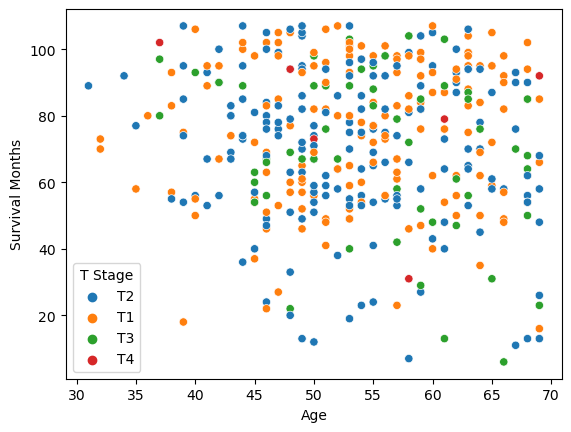

In [11]:
import seaborn as sns # for plotting
sns.scatterplot(data=df_sample, x="Age", y="Survival Months", hue="T Stage");

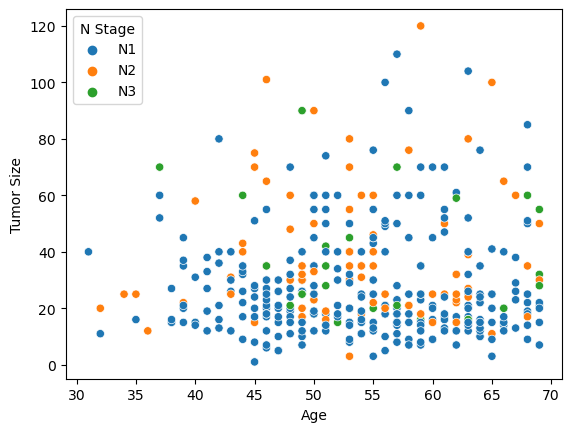

In [12]:
sns.scatterplot(data=df_sample, x="Age", y="Tumor Size", hue="N Stage");

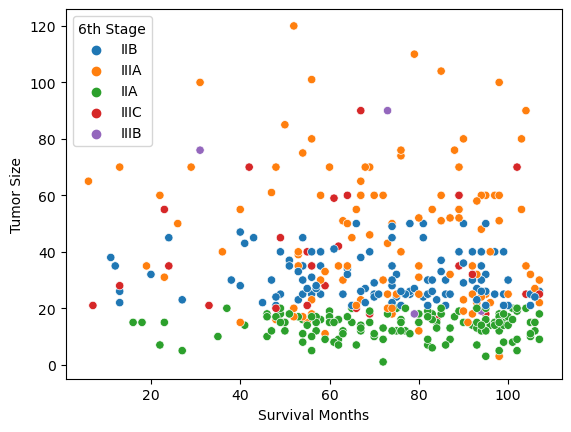

In [13]:
sns.scatterplot(data=df_sample, x="Survival Months", y="Tumor Size", hue="6th Stage");

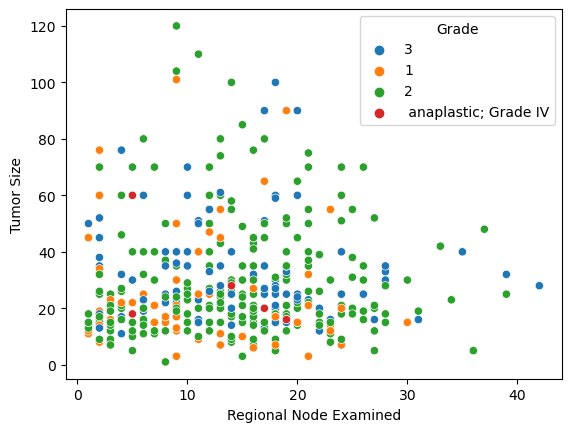

In [14]:
sns.scatterplot(data=df_sample, x="Regional Node Examined", y="Tumor Size", hue="Grade");

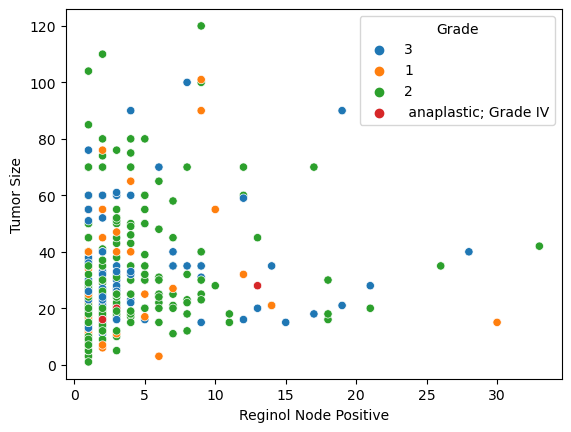

In [15]:
sns.scatterplot(data=df_sample, x="Reginol Node Positive", y="Tumor Size", hue="Grade");

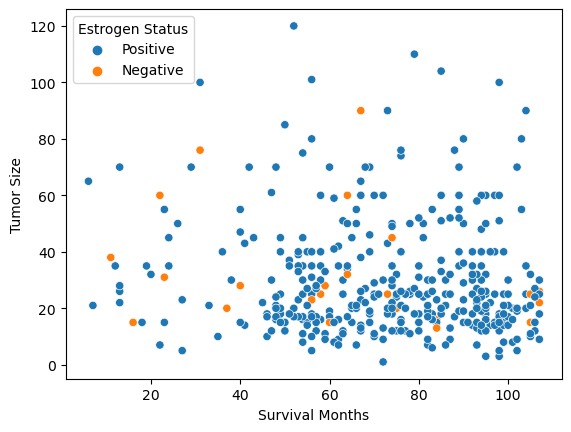

In [16]:
sns.scatterplot(data=df_sample, x="Survival Months", y="Tumor Size", hue="Estrogen Status");

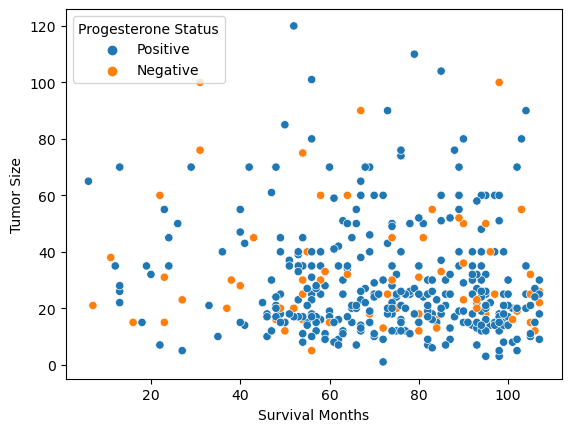

In [17]:
sns.scatterplot(data=df_sample, x="Survival Months", y="Tumor Size", hue="Progesterone Status");

In [18]:
df.duplicated().sum()
df = df.drop_duplicates()
df

,Age,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
0,68,0,0,0,3,1,4,1,1,24,1,60
1,50,1,1,2,2,1,35,1,1,14,5,62
2,58,2,2,4,2,1,63,1,1,14,7,75
3,58,0,0,0,3,1,18,1,1,2,1,84
4,47,1,0,1,3,1,41,1,1,3,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,0,0,0,2,1,9,1,1,1,1,49
4020,56,1,1,2,2,1,46,1,1,14,8,69
4021,68,1,0,1,2,1,22,1,0,11,3,69
4022,58,1,0,1,2,1,44,1,1,11,1,72


In [8]:
from sklearn.preprocessing import RobustScaler

tumor_sizes = df["Tumor Size"].to_numpy()

# Apllying RobustScaler to scale orginal numerical features
df[numerical_features] = RobustScaler().fit_transform(df[numerical_features])
df.head()

NameError: name 'numerical_features' is not defined

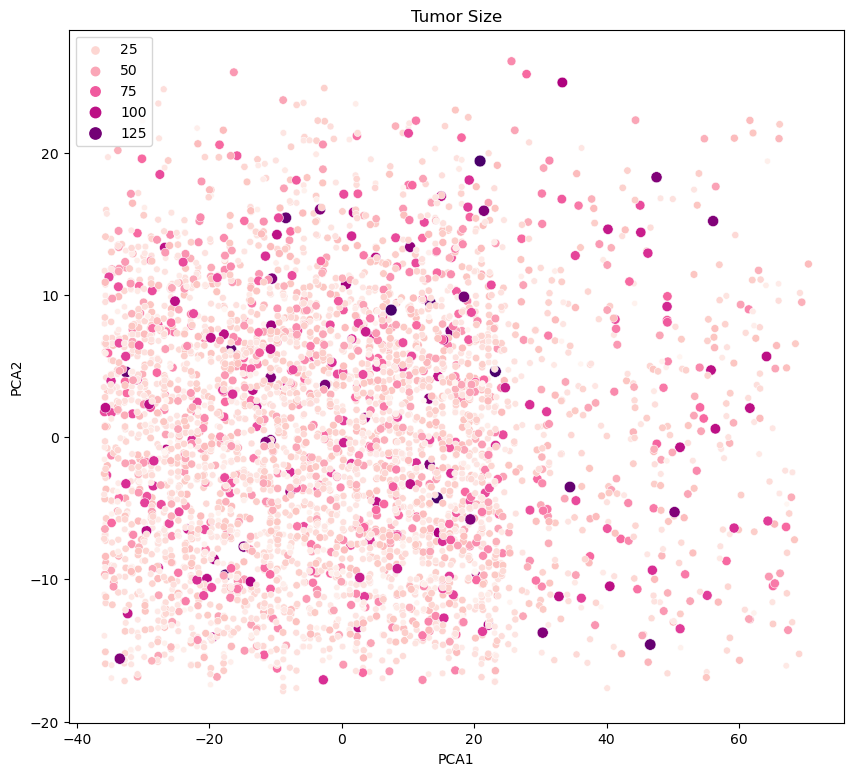

In [21]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
X = df.drop("Tumor Size", axis=1)
y = df["Tumor Size"]

# Transforming data into 2dim using PCA
pca = PCA(2)
pca_data = pca.fit_transform(X)
plt.figure(figsize=(10,9))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1],
                hue=tumor_sizes, palette='RdPu', size=tumor_sizes)
           
plt.title("Tumor Size")
plt.xlabel("PCA1")
plt.ylabel("PCA2");